<a href="https://colab.research.google.com/github/Satyam018/Deep-Learning-Project/blob/main/CNN%20Malaria%20Prediction/Untitled15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from google.colab import  drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls

drive  sample_data


In [5]:

%cd '/content/drive/My Drive'

/content/drive/My Drive


In [6]:
!ls

'A2-NishantAbhishek (1).zip'
 A2-NishantAbhishek.zip
 A3_NishantAbhishek.zip
 app-debug.apk
'cas - Copy.docx'
'Chemistry HL - Catrin Brown and Mike Ford - Second Edition - Pearson 2014.pdf'
'Colab Notebooks'
 cycloid.png
 datagraph.gsheet
 datagraph.xlsx
 data.xlsx
'For Loop Worksheet.gdoc'
'graphs (1).xlsx'
 graphs.xlsx
 images
 match_alpha.png
 match_animal.jpg
 match_birds.png
 match_color.png
 match_country.png
 match_flowers.jpg
 match_fruits.jpg
 match_number.png
 match_vegetables.jpg
'Math IA Brachistochrone.docx'
'MONASH APPLICATION.gdoc'
'MONASH APPLICATION.pdf'
 Ninja
 notes_20201106113409.gdoc
'phys hl.pdf'
'SAT Handbook.pdf'
'Satyam offer letter (1).docx'
'Satyam offer letter (2).docx'
'Satyam offer letter.docx'
'satyam resume.pdf'
'[Steve_Owen]_Chemistry_for_the_IB_Diploma_Coursebo(b-ok.xyz) (1).pdf'
'[Steve_Owen]_Chemistry_for_the_IB_Diploma_Coursebo(b-ok.xyz).pdf'
'Untitled drawing (1).gdraw'
'Untitled drawing (2).gdraw'
'Untitled drawing (3).gdraw'
'Untitled drawing (4)

In [7]:
%cd 'images' 

/content/drive/My Drive/images


In [8]:
import pathlib
import PIL.Image as Image

In [9]:
!ls

animal	bird  Parasitized  Uninfected


In [10]:
parasitized=[]
for img in pathlib.Path('Parasitized').iterdir():
  parasitized.append(img)


In [11]:
len(parasitized)

1001

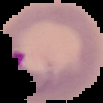

In [12]:
Image.open(parasitized[1])

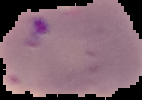

In [13]:
Image.open(parasitized[10])

In [14]:
uninfected=[]
for img in pathlib.Path('Uninfected').iterdir():
  uninfected.append(img)
  

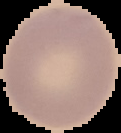

In [15]:
Image.open(uninfected[0])

In [16]:
Image_class={
    'Parasitized':parasitized,
    'Uninfected':uninfected
}

In [17]:
Class_label={
    'Parasitized':1,
    'Uninfected':0
}

In [18]:
import cv2 as cv
import matplotlib.pyplot as plt


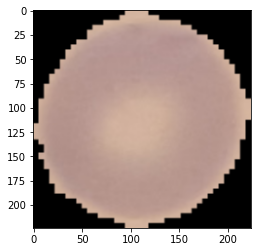

In [19]:
image=cv.imread(str(uninfected[0]))
img=cv.cvtColor(image, cv.COLOR_RGB2BGR)
resized_image=cv.resize(img,(224,224))
plt.imshow(resized_image)

In [20]:
image.shape

(133, 121, 3)

In [21]:
IMAGE_SHAPE=(224,224)
IMAGE_SHAPE

(224, 224)

In [22]:

x,y=[],[]
for name,img in Image_class.items():
  for image in img:

    image=cv.imread(str(image))
    img=cv.cvtColor(image, cv.COLOR_RGB2BGR)
    resized_image=cv.resize(img,IMAGE_SHAPE)
    x.append(resized_image)
    y.append(Class_label[name])
  

In [23]:
len(x)

2002

In [24]:
y[1000]

1

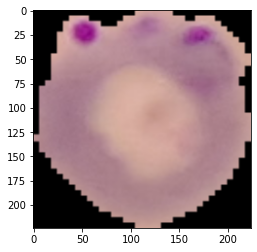

In [25]:
plt.imshow(x[5])

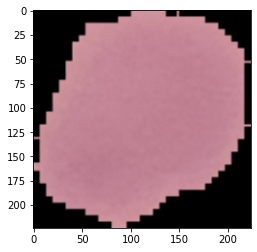

In [26]:
plt.imshow(x[2000])

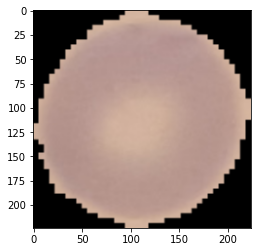

In [27]:
plt.imshow(x[1001])

In [28]:
y[1001]

0

In [29]:
import numpy as np
x=np.array(x)/255
y=np.array(y)

In [30]:
x.shape

(2002, 224, 224, 3)

In [31]:
y.shape

(2002,)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=25)

In [33]:
x_train.shape

(1601, 224, 224, 3)

In [34]:
x_test.shape

(401, 224, 224, 3)

In [35]:
from tensorflow import keras

In [36]:
#data argumentation
data_argumentation=keras.Sequential([
                keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal',input_shape=(224,224,3)),
                keras.layers.experimental.preprocessing.RandomRotation(.1),
                keras.layers.experimental.preprocessing.RandomZoom(.1)
])

In [37]:
#using mobile net model
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [38]:
import tensorflow_hub as hub
pretrainedmodel=hub.KerasLayer(
    feature_extractor_model,input_shape=(224,224,3),trainable=False
)

In [39]:
model=keras.Sequential([
                        data_argumentation,
                        pretrainedmodel,
                        keras.layers.Dense(1,activation='sigmoid')
])

In [40]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [41]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
51/51 [==============================] - 55s 994ms/step - loss: 0.5188 - accuracy: 0.7564
Epoch 2/5
51/51 [==============================] - 52s 1s/step - loss: 0.3063 - accuracy: 0.8926
Epoch 3/5
51/51 [==============================] - 49s 959ms/step - loss: 0.2469 - accuracy: 0.9101
Epoch 4/5
51/51 [==============================] - 49s 966ms/step - loss: 0.2277 - accuracy: 0.9163
Epoch 5/5
51/51 [==============================] - 49s 964ms/step - loss: 0.2054 - accuracy: 0.9225


In [42]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 10s 741ms/step - loss: 0.2538 - accuracy: 0.9027


[0.25383880734443665, 0.9027431607246399]

In [43]:
predicted=model.predict(x_test)